In [11]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

**Aufgabe 22:**

Wir betrachten in diesem Beispiel die Lagrange-Polynominterpolation auf dem Dreick $T \in \mathbb{R}^2$, welches durch die Eckpunte $(0, 0)$, $(1, 0)$ und $(0, 1)$ gegeben ist. Sei dazu $\Pi_n$ der Raum aller Linearkombinationen von Polynomen
der Form

$$(x, y) \in \mathbb{R}^2 \mapsto x^k y^j \in \mathbb{R},
\qquad
j, k  = 0, \ldots, n, j + k \leq n.$$

Beweisen Sie, dass die Lagrange-Polynominterpolationsaufgabe eindeutig lösbar ist, wenn

**a)** ein Polynom aus $\Pi_1$ gesucht und die Stützwerte an den Eckpunkten des Dreiecks gegeben sind,

**b)** ein Polynom aus $\Pi_2$ gesucht und die Stutzwerte an den Eckpunkten sowie den Mittelpunkten der Dreickskanten gegeben sind.

Geben Sie für beide Aufgaben die zugehörige Lagrange-Basis an, d.h. die Basisfunktionen, die an jeweils einem Stützpunkt $1$ und an allen anderen $0$ sind.

In [6]:
A = np.array([[1, 0,   0,   0,   0,   0  ],
              [1, 1/2, 0,   0,   1/4, 0  ],
              [1, 1,   0,   0,   1,   0  ],
              [1, 1/2, 1/2, 1/4, 1/4, 1/4],
              [1, 0,   1,   0,   0,   1  ],
              [1, 0,   1/2, 0,   0,   1/4]])

det = np.linalg.det(A)
display(det)

0.015625000000000007

In [3]:
M = np.zeros((6, 6))

for n in range(6):
    s = np.eye(6)[n]
    M[n] = np.linalg.solve(A, s)

display(M)

array([[ 1., -3., -3.,  4.,  2.,  2.],
       [ 0.,  4.,  0., -4., -4., -0.],
       [ 0., -1.,  0.,  0.,  2., -0.],
       [ 0.,  0.,  0.,  4., -0., -0.],
       [ 0.,  0., -1.,  0., -0.,  2.],
       [ 0.,  0.,  4., -4., -0., -4.]])

In [25]:
# evaluates the k-th "Lagrange Polynomial" at (x, y)
def L(k, M, x, y):
    var   = np.array([1, x, y, x*y, x*x, y*y])
    coeff = M[k]

    return var @ coeff

points = np.array([(0,   0  ),
                   (1/2, 0  ),
                   (1,   0  ),
                   (1/2, 1/2),
                   (0,   1  ),
                   (0,   1/2)])

print("")

for k in range(6):
    for p in points:
        display("L_{} ({}, {}) = {}".format(k, p[0], p[1], L(k, M, *p)))
    
    print("")

'L_0 (0.0, 0.0) = 1.0'

'L_0 (0.5, 0.0) = 0.0'

'L_0 (1.0, 0.0) = 0.0'

'L_0 (0.5, 0.5) = 0.0'

'L_0 (0.0, 1.0) = 0.0'

'L_0 (0.0, 0.5) = 0.0'

'L_1 (0.0, 0.0) = 0.0'

'L_1 (0.5, 0.0) = 1.0'

'L_1 (1.0, 0.0) = 0.0'

'L_1 (0.5, 0.5) = 0.0'

'L_1 (0.0, 1.0) = 0.0'

'L_1 (0.0, 0.5) = 0.0'

'L_2 (0.0, 0.0) = 0.0'

'L_2 (0.5, 0.0) = 0.0'

'L_2 (1.0, 0.0) = 1.0'

'L_2 (0.5, 0.5) = 0.0'

'L_2 (0.0, 1.0) = 0.0'

'L_2 (0.0, 0.5) = 0.0'

'L_3 (0.0, 0.0) = 0.0'

'L_3 (0.5, 0.0) = 0.0'

'L_3 (1.0, 0.0) = 0.0'

'L_3 (0.5, 0.5) = 1.0'

'L_3 (0.0, 1.0) = 0.0'

'L_3 (0.0, 0.5) = 0.0'

'L_4 (0.0, 0.0) = 0.0'

'L_4 (0.5, 0.0) = 0.0'

'L_4 (1.0, 0.0) = 0.0'

'L_4 (0.5, 0.5) = 0.0'

'L_4 (0.0, 1.0) = 1.0'

'L_4 (0.0, 0.5) = 0.0'

'L_5 (0.0, 0.0) = 0.0'

'L_5 (0.5, 0.0) = 0.0'

'L_5 (1.0, 0.0) = 0.0'

'L_5 (0.5, 0.5) = 0.0'

'L_5 (0.0, 1.0) = 0.0'

'L_5 (0.0, 0.5) = 1.0'

**Aufgabe 23:**

Sei $f: [−5, 5] \to \mathbb{R}$ gegeben durch

$$ f(x) = \frac{1}{(1 + x)^2}. $$

Schreiben Sie ein Programm welches $f$ mit äquidistanten und Chebyshev Knoten für beliebige Ordnung $n$ interpoliert und plotten Sie die interpolierenden Polynome. Was stellen Sie für große $n$ fest?

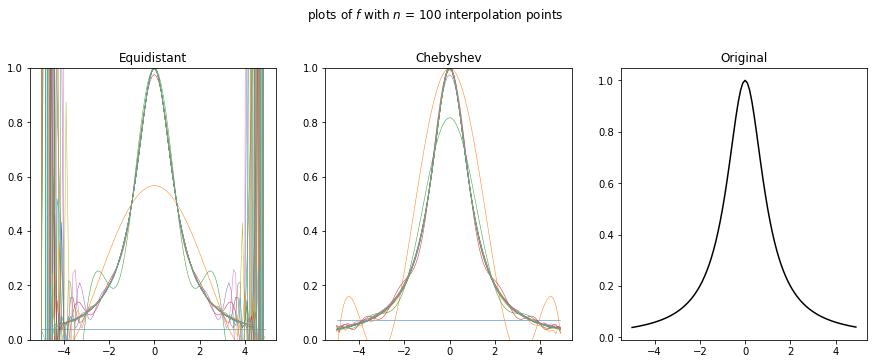

In [187]:
# function to be interpolated
def f(x):
    return 1/(1 + x*x)

# returns n equidistant knots in the interval (a, b)
def equidistant(a, b, n):
    x = np.linspace(a, b, n)
    return x

# returns n chebyshev knots in the interval (a, b)
def chebyshev(a, b, n):
    x = np.array([m.cos((2*i + 1) * m.pi / (2*n + 2)) for i in range(n+1)])
    x *= (b - a)/2
    return x

# returns interpolating polynomial p of function f with interpolation points x via linear equation system
def interpolate(f, x):
    def p(t):
        n = len(x)
        y = np.array(f(x))
        V = np.vander(x, increasing = True)

        coeff = np.linalg.solve(V, y)

        tmp = 0      
        for i in range(n):
            tmp += coeff[i] * t**i

        return tmp

    return p

# maximum number of knots used for interpolation
n = 100

# a ... interval lower bound
# b ... interval upper bound

a = -5
b =  5

# interpolating polynomials of f using equidistant knots
p = []

for i in range(n):
    x = equidistant(a, b, i+1)
    p += [interpolate(f, x)]

# interpolating polynomials of f using chebyshev knots
q = []

for i in range(n):
    x = chebyshev(a, b, i+1)
    q += [interpolate(f, x)]

# dt   ... distance between grid points
# grid ... points that are plotted

dt   = 0.1
grid = np.arange(a, b, dt)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))

fig.suptitle("plots of $f$ with $n$ = {} interpolation points".format(n), y = 1.05)

ax1.set_title("Equidistant")
ax2.set_title("Chebyshev")
ax3.set_title("Original")


for i in range(0, n-1, 5):
    ax1.plot(grid, p[i](grid), linewidth = 0.5)
    ax2.plot(grid, q[i](grid), linewidth = 0.5)

ax3.plot(grid, f(grid), color = "black")

ax1.set_ylim([0, 1])
ax2.set_ylim([0, 1])

#plt.subplots_adjust(wspace = 0.5)

plt.show()